In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import time
from pandas.io.json import json_normalize

In [2]:
# r = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=CL&outputsize=compact&apikey=ac9ba10aa04a7d")
# df = pd.read_json()

In [3]:
import requests
import pandas as pd
import json

url = "https://www.alphavantage.co/query"
params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": "CL",
        "outputsize": "full",
        "apikey": "ac9ba10aa04a7d"}



response = requests.get(url, params=params)
data = response.json()

def df_from_response(data,
         columns=['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']):

    def convert_response(d):
        # convert the response into datetimerecords that can be
        # parsed by Pandas
        for dt, prec in d['Time Series (Daily)'].items():
            r = { 'date': dt}
            r.update(prec)
            yield r
               
    # pass your response 'page'
    df = pd.DataFrame(convert_response(data))
    # rename the columns    
    df = df.rename(columns={'1. open': 'Open',
                            '2. high': 'High',
                            '3. low': 'Low',
                            '4. close': 'Close',
                            '5. adjusted close': 'AdjClose',
                            '6. volume': 'Volume'})
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    # extract the default columns
    df = df[columns]
    return df

df = df_from_response(data)
df.reset_index(level=0, inplace=True)
df.head()
# df = pd.DataFrame({'dates':pd.date_range('2018-01-01','2019-01-01')})
# newfd = df.columns = ['date' if x=='datetime' else x for x in df.columns]
# nf_h = pd.DataFrame(newfd)
# print('Data Frame:', nf_h)

,date,Open,High,Low,Close,AdjClose,Volume
0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600
3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100
4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700


In [4]:
df1 = pd.DataFrame(df)
df1.reset_index(level=0, inplace=True)
df1.head()

,index,date,Open,High,Low,Close,AdjClose,Volume
0,0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
2,2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600
3,3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100
4,4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700


In [5]:
df1['month'] = df1['date'].dt.month
df1['year'] = df['date'].dt.year
df1.head()

,index,date,Open,High,Low,Close,AdjClose,Volume,month,year
0,0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500,1,1998
1,1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000,1,1998
2,2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600,1,1998
3,3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100,1,1998
4,4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700,1,1998


In [6]:
# df1.groupby(df1['date'].map(lambda x: x.year))
# df1.head()

# df1['date'].dt.to_period('A')
# df1.groupby(df1['date'].dt.to_period('Y'))['AdjClose'].agg(['count'])


In [7]:
# grouped = df1.groupby(['date', 'month', 'year'])
# grouped.groups
# gb = df1.groupby('month')
# for name, group in grouped:
#     print(name)
#     print(group)

In [8]:
df1.head()

,index,date,Open,High,Low,Close,AdjClose,Volume,month,year
0,0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500,1,1998
1,1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000,1,1998
2,2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600,1,1998
3,3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100,1,1998
4,4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700,1,1998


In [9]:
df2 = df1[['date', 'year', 'month', 'Open', 'High', 'Low', 'Close', 'Volume']]
df2.set_index('date')
df2.head()

,date,year,month,Open,High,Low,Close,Volume
0,1998-01-02,1998,1,74.5000,74.5000,72.6900,73.2500,451500
1,1998-01-05,1998,1,74.0000,74.8800,73.2500,74.8800,770000
2,1998-01-06,1998,1,74.9400,74.9400,71.7500,71.9400,861600
3,1998-01-07,1998,1,70.2500,71.6300,69.8800,71.6300,1125100
4,1998-01-08,1998,1,71.6300,71.7500,69.3800,69.7500,949700


In [70]:
# df3 = df2.loc['2001-07-03' : '1998-01-08']
# df3.head()
# import datetime 
# # df2.loc[datetime.date(year=2014,month=1,day=1):datetime.date(year=2014,month=2,day=1)]
# import numpy as np
# import pandas as pd

df3 = df2[(df2['date'] > '2000-07-01') & (df2['date'] < '2000-09-15')]
df3.head()

df4 = df2[(df2['date'] > '2001-07-01') & (df2['date'] < '2001-09-15')]
df4.head()

,date,year,month,Open,High,Low,Close,Volume
881,2001-07-02,2001,7,58.9900,60.2200,58.9900,59.9800,2085500
882,2001-07-03,2001,7,60.0000,60.4500,59.3800,60.2500,707500
883,2001-07-05,2001,7,60.1000,60.1000,59.0500,59.6300,1155600
884,2001-07-06,2001,7,59.6300,59.7000,58.8000,59.0400,1003100
885,2001-07-09,2001,7,59.0400,59.0700,58.0000,58.4300,1981300


In [110]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

df3 = df2[(df2['date'] > '2000-07-01') & (df2['date'] < '2000-09-15') ]
df3.set_index('date').head()

# df4 = df2[(df2['date'] > '2001-07-01') & (df2['date'] < '2001-09-15')]
# df4.set_index('date').head()

# rollcorr = pd.rolling_corr(wpi, sp500, 50).dropna()

# plt.figure(figsize=(10,3))
# plt.plot(rollcorr)
# plt.grid()
# plt.ylabel("Linear Correlation (50 day rolling window)", fontsize=8)

,year,month,Open,High,Low,Close,Volume
date,,,,,,,
2000-07-03,2000,7,59.6300,60.0000,58.6300,59.8800,864500
2000-07-05,2000,7,59.0000,59.8100,58.8800,59.3100,1610600
2000-07-06,2000,7,59.8800,60.2500,58.7500,58.8100,1355900
2000-07-07,2000,7,57.5000,57.9400,56.8800,57.1900,2124900
2000-07-10,2000,7,57.2500,57.8800,55.5000,55.6900,1475400


In [111]:
df3close = pd.DataFrame(df3.Close)
df3close.head()

,Close
630,59.8800
631,59.3100
632,58.8100
633,57.1900
634,55.6900


In [112]:
df3close['MA_7'] = df3close.Close.rolling(7).mean().shift()
df3close['MA_49'] = df3close.Close.rolling(49).mean().shift()

In [113]:
df3close['MA_7'].head()

630   NaN
631   NaN
632   NaN
633   NaN
634   NaN
Name: MA_7, dtype: float64

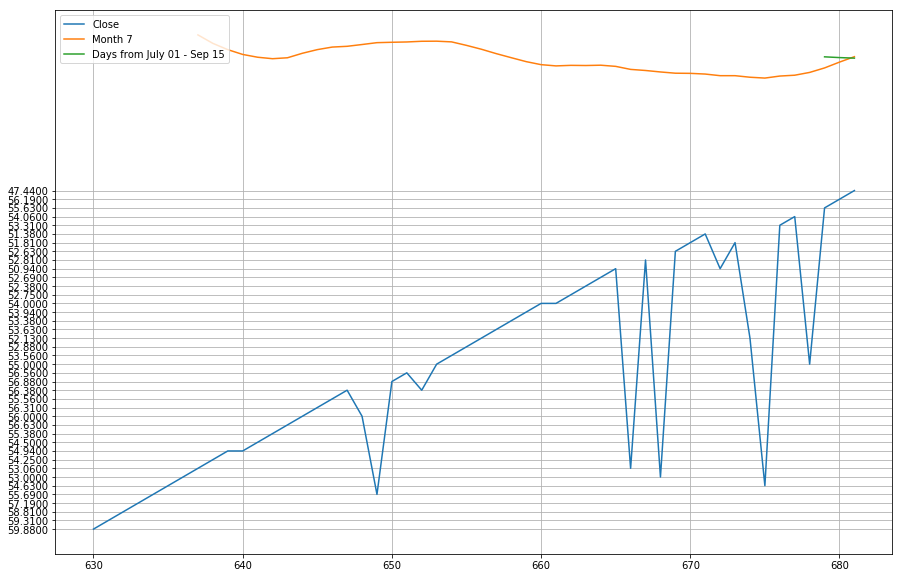

In [114]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df3close['Close'],label='Close')
plt.plot(df3close['MA_7'], label='Month 7')
plt.plot(df3close['MA_49'], label='Days from July 01 - Sep 15')
plt.legend(loc=2)

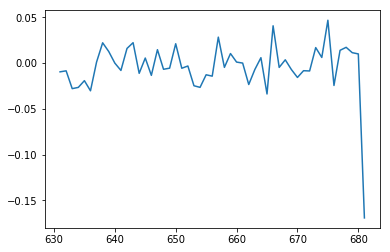

In [115]:
df3close[['Close']]
df3close.Close.dtype
df3close.Close = df3close.Close.astype(float)

df3close["change"] = np.log(df3close["Close"] / df3close["Close"].shift())
plt.plot(df3close.change)

In [ ]:

x = df3[['Close']]
x.Close.dtype
x.Close = df.Close.astype(float)

y = df3[['month']]
y.month.dtype
y.month = df.month.astype(float)

plt.xlabel("Current")
plt.ylabel("Voltage")
plt.title("Ohm's Law")

    
plt.xlim(['2000-07-01', '2000-09-15'])
plt.ylim([0, 60])


plt.figure()
df3 = np.arange('2000-07-01', '2000-09-15', dtype='datetime64[D]')
df3 = list(map(pd.to_datetime, df3)) # convert the map to a list to get rid of the error
plt.plot(df3, linear_data, '-o',  df3, exponential_data, '-o')

NameError: name 'date' is not defined

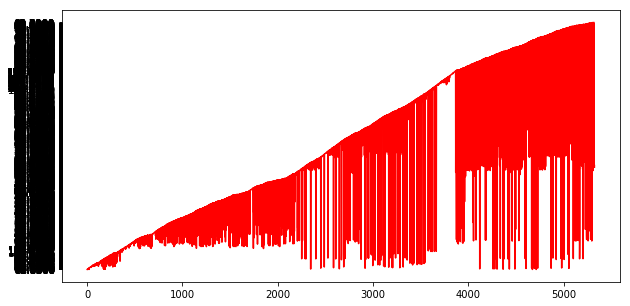

In [24]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from pandas_datareader import data, wb
 
%matplotlib inline

df3 = df2[(df2['date'] > '2000-07-01') & (df2['date'] < '2000-09-15')]
df3.set_index('date')

# x = df3[['month']]
# # x.Close.dtype
# # x.Close = df.Close.astype(float)

x = df3[['Close']]
x.Close.dtype
x.Close = df.Close.astype(float)

# y = df3[['month']]
# y.month.dtype
# y.month = df.month.astype(float)

plt.figure(figsize=(10,5))
plt.plot(df.Close, color='red', label="WPI Crude Oil")
plt.plot(date, "r", label="Predicted Oil Price")
plt.xlim(['2000-07-01', '2000-09-15'])  # in-sample & out-of-sample
plt.ylim(['Close'])
plt.ylabel("USD/barrel")
plt.legend(loc=3)
plt.grid()

In [33]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from pandas_datareader import data, wb
import os
import numpy as np
 
%matplotlib inline

# df3 = df2[(df2['date'] > '2000-07-01') & (df2['date'] < '2000-09-15')]
# df3.set_index('date')

# plt.figure(figsize = (18,9))
# plt.plot(range(df3.shape[0]),(df3['Low']+df3['High'])/2.0)
# plt.xticks(range(0,df3.shape[0],500),df3['date'].loc[::500],rotation=45)
# plt.xlabel('Date',fontsize=18)
# plt.ylabel('Mid Price',fontsize=18)
# plt.show()

In [ ]:
df3 = df2[(df2['date'] > '2000-07-01') & (df2['date'] < '2000-09-15')]
df3.set_index('date').head()

import pandas
import matplotlib.pyplot as plt

plt.close('all')
fig, ax = plt.subplots(1)
# ax.plot(r.date, r.close)

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
# ax1.plot(x)


# def plot_test(file):



#     df = pandas.read_csv(file)

#     # convert timestamp
# df3['date'] = pandas.to_datetime(df['date'], format = '%Y-%m-%d %H:%M')

plt.figure(figsize=(15,20))
plt.grid(True)

    # plot prices
ax1 = plt.subplot(211)
ax1.plot_date(df3['date'], df3['Open'], '-', label = 'open')
ax1.plot_date(df3['date'], df3['Close'], '-', label = 'close')
ax1.plot_date(df3['date'], df3['High'], '-', label = 'high')
ax1.plot_date(df3['date'], df3['Low'], '-', label = 'low')
ax1.legend()

    # plot volume
ax2 = plt.subplot(212)

    # issue: https://github.com/matplotlib/matplotlib/issues/9610
df3.set_index('date', inplace = True)
df3.index.to_pydatetime()

ax2.bar(df3.index, df3['month'], width = 1e-3)
ax2.xaxis_date()
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.show()

In [ ]:
df3.describe()

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df3['Close'], label='Close Price')
plt.plot(df3['month'], label='Month')

plt.legend(loc=2)
# plot.show()

In [ ]:
# df3['change'] = np.log(df3['Close'] / df3['Close'].shift())

In [ ]:
df4 = df2[(df2['date'] > '2000-07-01') & (df2['date'] < '2000-10-01')]
df4.std()

In [ ]:
df10 = pd.DataFrame(df4),index=df4.index, columns=list('ABCD')
df10 = df4.cumsum()
df10.plot()

In [ ]:
df4.head()

In [ ]:
# compare = pd.DataFrame({'Original': df3, 'Transformed': df4})
# compare.plot()
df3['key'] = 'month'
df4['key'] = 'month'


df5 = pd.merge(df3.reset_index(), df4.reset_index(), on=['key'], how='inner').set_index(['key'])
df5.groupby('key').sum().unstack().plot(kind = 'bar')


In [ ]:
index = pd.date_range('9/1/2000', periods=1100)

ts = pd.Series(np.random.normal(0.5, 2, 1100), index)

ts = ts.rolling(window=100,min_periods=100).mean().dropna()

ts.head()

In [ ]:
key = lambda x: x.year

zscore = lambda x: (x - x.mean()) / x.std()

In [ ]:
transformed = ts.groupby(key).transform(zscore)

grouped = ts.groupby(key)

In [ ]:
grouped.mean()

In [ ]:
grouped.std()

In [ ]:
grouped_trans = transformed.groupby(key)

In [ ]:
grouped_trans.mean()

In [ ]:
grouped_trans.std()

In [ ]:
compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})

compare.plot()

In [ ]:
# # Set date to datetime format. I'm assuming it's day.month.year in your original dataframe
# df['datetime'] = pd.to_datetime(df.datetime, format = '%d.%m.%Y %H:%M')

# new_df = (df.groupby(['AdjClose', pd.Grouper(key='datetime', freq='5min')])
#           .agg({'Close':'mean', 'Open':'sum'}))

# new_df

df = df.set_index(df.date).drop('date', axis=1)
df.rolling(3).mean().plot()

In [ ]:
#it works, but only for count. need to create custom range
# df_daily=df.groupby('date').agg(['count']).reset_index()
# df_daily
# df_daily.plot(x='date', y='AdjClose',kind="bar")
# plt.show()

In [ ]:
df1 = df.groupby('date')['Close'].count()
df1.head()

In [ ]:
# df.resample('M').count()

In [ ]:
df =  pd.to_datetime(df.datetime, format='%m-%d-%y')
print(dates)


# df = (df.assign(datetime=dates)
#         .groupby(['Close', pd.Grouper(key='datetime', freq='3D')])
#         .sum()
#         .reset_index())

In [ ]:
# Create data frame
df = pd.date_range(start='1/1/2018', end='1/08/2018')
df
# Create datetimes
# df['date'] = pd.date_range('1/1/2001', periods=100000, freq='H')
# df.head()

In [ ]:
import json
import urllib.request

QUERY_URL = "https://www.alphavantage.co/query?function={REQUEST_TYPE}&apikey={KEY}&symbol={SYMBOL}&outputsize=compact"
API_KEY = "ac9ba10aa04a7d"

# "https://www.alphavantage.co/" + "query?" + "function=" +  TIME_SERIES_DAILY + "&symbol=" + compName +
#             "&outputsize=compact&apikey=" + gkey + '&format=json'


def _request(symbol, req_type):
    with urllib.request.urlopen(QUERY_URL.format(REQUEST_TYPE=req_type, KEY=API_KEY, SYMBOL=symbol)) as req:
        data = req.read().decode("UTF-8")
    return data

def get_daily_data(symbol):
    return json.loads(_request(symbol, 'TIME_SERIES_DAILY'))

print(get_daily_data("CL")["Time Series (Daily)"]["2019-02-28"])

In [ ]:
# import pandas as pd
# import requests
# import json
# import time
# from pandas.io.json import json_normalize

# def get_reverse_geocode_data(row):
#     try:
# #         YOUR_API_KEY = 'ac9ba10aa04a7d'
#        url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=CL&outputsize=full&apikey=ac9ba10aa04a7d"
        
#         response = (requests.get(url).text)
#         response_json = json.loads(response)
#         time.sleep(0.5)
#         return response_json
    
#     except Exception as e:
#         raise e

In [ ]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = 'CL'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('CL', 'google', start_date, end_date)

panel_data.to_frame().head(9)

In [ ]:


from alpha_vantage.timeseries import TimeSeries
key = "ac9ba10aa04a7d"

ts = TimeSeries(key=key, output_format="pandas")
data, meta_data = ts.get_daily("CL",outputsize="full")
(data.index[-1].astype(np.datetime64) - data.index[0].astype(np.datetime64)).days

In [ ]:
# # https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=xom&outputsize=full&apikey=ac9ba10aa04a7d

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=CL&outputsize=full&apikey=ac9ba10aa04a7d"


    
datatype = "TIME_SERIES_DAILY"
compName = "CL"
    
compName = "CL"
params["address"] = target_city
    
    
    def TIME_SERIES_DAILY(row):
    try:
        YOUR_API_KEY = 'ac9ba10aa04a7d'
        url = "https://www.alphavantage.co/" + "query?" + "function=" +  TIME_SERIES_DAILY + "&symbol=" + compName +
            "&outputsize=compact&apikey=" + gkey + '&format=json'
        
        response = (requests.get(url).text)
        response_json = json.loads(response)
        time.sleep(0.5)
        return response_json
    
    except Exception as e:
        raise e
        

In [ ]:
# import requests
# import alpha_vantage
# import json


# API_URL = "https://www.alphavantage.co/query" 
# symbols = "CL"

# start_date = '2000-07-01'
# end_date = '2016-12-31'

# for symbol in symbols:
#         data = { "function": "TIME_SERIES_DAILY", 
#         "symbol": symbol,    
#         "datatype": "json", 
#         "apikey": "ac9ba10aa04a7d" } 
#         response = requests.get(API_URL, data) 
#         data = response.json()
#         print(symbol)
#         a = (data['Time Series (Daily)'])
#         keys = (a.keys())
#         for key in keys:
#                 print(a[key]['2. high'] + " " + a[key]['4. close'])
                


In [ ]:
import pandas as pd
import requests
import json
import time
from pandas.io.json import json_normalize
from config import gkey
from alpha_vantage.timeseries import TimeSeries



def get_daily_data(symbol, request_type, api_key):

    url = f"{main_url}{request_type}&symbol={symbol}&apikey={api_key}"

    with urllib.request.urlopen(url) as req:
        return json.load(req)


if __name__ == "__main__":
    # Test: making a json object for Apple and example of getting a date's activity
    request_type_url = "function=TIME_SERIES_DAILY"

    apple = get_daily_data('AAPL', request_type=request_type_url, api_key=my_key)
    print(apple["Time Series (Daily)"]["2018-03-02"])

In [ ]:
import requests
import alpha_vantage
import json


API_URL = "https://www.alphavantage.co/query" 
symbols = ['XCOM',"INTC","PDD"]

for symbol in symbols:
        data = { "function": "TIME_SERIES_INTRADAY", 
        "symbol": symbol,
        "interval" : "60min",       
        "datatype": "json", 
        "apikey": "XXX" } 
        response = requests.get(API_URL, data) 
        data = response.json()
        print(symbol)
        a = (data['Time Series (60min)'])
        keys = (a.keys())
        for key in keys:
                print(a[key]['2. high'] + " " + a[key]['5. volume'])

In [ ]:
import os
import pandas as pd
pd.set_option("max_rows", 10)
import datetime
import requests_cache

expire_after = datetime.timedelta(days=1)
# session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)

api_key = os.environ.get("ac9ba10aa04a7d")  # api_key = "YOURAPIKEY"
df, metadata = get_ts_data("MSFT", interval="W", api_key=api_key, session=session)
print(df)
# print(df.dtypes)
# print(metadata)

# df, metadata = get_ts_data("MSFT", interval="15Min", api_key=api_key, session=session)
# print(df)
# print(df.dtypes)
# print(metadata)

# df, metadata = get_ts_data("MSFT", interval="D", api_key=api_key, session=session)
# print(df)
# print(df.dtypes)
# print(metadata)

# df, metadata = get_ts_data("MSFT", interval="D", outputsize="full", api_key=api_key, session=session)
# print(df)
# print(df.dtypes)
# print(metadata)

# df, metadata = get_sector_performances(api_key=api_key, session=session)
# print(df)
# print(df.dtypes)
# print(metadata)

In [ ]:
From alphavantage.price_history import (
  AdjustedPriceHistory, get_results, PriceHistory, IntradayPriceHistory,
  filter_dividends
)

# weekly prices
history = PriceHistory(period='W', output_size='compact')
results = history.get('AAPL')

# intraday prices, 5 minute interval
history = IntradayPriceHistory(utc=True, interval=5)
results = history.get('AAPL')

# adjusted daily prices
history = AdjustedPriceHistory(period='D')
results = history.get('AAPL')
dividends = list(filter_dividends(results.records))

# Return multiple tickers
parameters = {'output_size': 'compact', 'period': 'D'}
tickers = ['AAPL', 'MSFT']
results = dict(get_results(PriceHistory, tickers, parameters))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
import csv
import json
from pandas.io.json import json_normalize

from config import (stock_key)
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=CL&outputsize=full&apikey=ac9ba10aa04a7d"



response = requests.get(url)
data = response.json()
data = data["Time Series (Daily)"]
# df = pd.DataFrame.from_dict(data, orient='index')
# data = json.dumps(data)
# df = pd.read_json(data)
# data = json.loads(data)
# df = json_normalize(data)

dates = []
opens = []
closes = []


for key, value in data.items():

#     print(key)
#     print("open: ", value["1. open"])
#     print("close: ", value["4. close"])

#     print("----------------------------")
   close_var = value["4. close"]
   dates.append(key)
   opens.append(value["1. open"])
   closes.append(close_var)
# dates

# df

# opens

d = {'Date': dates, 'Open': opens, 'Close': closes}
# d

df = pd.DataFrame(data=d)

df.head()

In [ ]:
# df1 = df.groupby('Date')['2000']
# df1['Date'] = pd.to_datetime(df1['Date'])
# df1 = df.sort_values(by='Date')

In [ ]:
import datetime
datetime.datetime.strptime
# df.loc[datetime.tetime date(year=2014,month=1,day=1):datetime.date(year=2014,month=2,day=1)
# df.head()      
       
df[(df['Date']>datetime.date(2016,1,1)) & (df['Date']<datetime.date(2016,3,1))]         